In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from src.ProbBidClearing import ProbBidClearing

In [2]:
## Initialize ProbBidClearing Object

clearer = ProbBidClearing()

In [3]:
## Sample bidding environment

RTP = 30.02044
bid = 36.13978
SOC = 0.5
attitude = "honest"

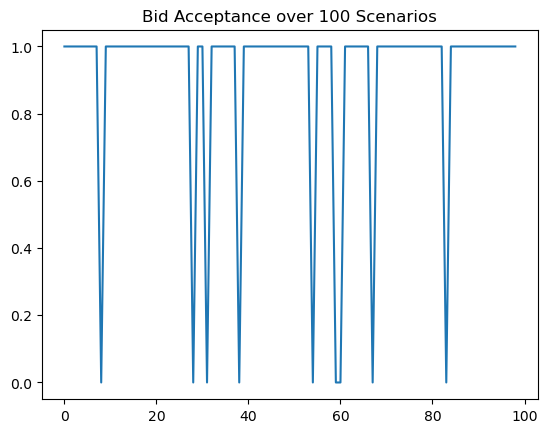

In [11]:
## Test if the discharge bid was accepted

accept = []
n = 100

for i in range(1,n):
    accept.append(clearer.norm_prob_clear(RTP, bid, attitude, SOC))

## Show bid acceptance over scenarios
plt.plot(accept)
plt.title("Bid Acceptance over " + str(n) + " Scenarios")
plt.show()

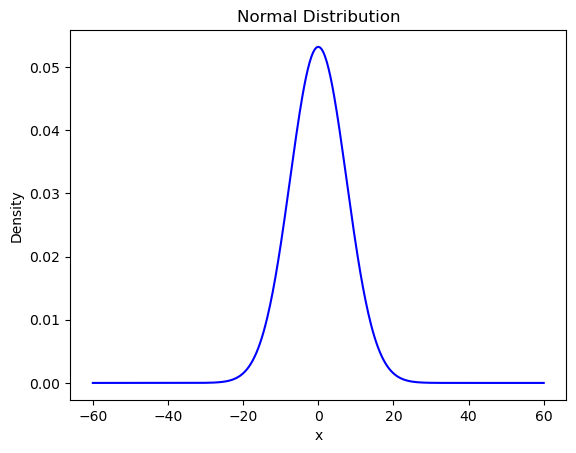

In [13]:
## Visualization

# Define the range for x values
mean = 0
std = 15
x = np.linspace(mean-4*std, mean+4*std, 500) 

# Compute the PDF
pdf = norm.pdf(x, loc=mean, scale=std/2)

# Plot the PDF
plt.plot(x, pdf, color='blue')
plt.title("Normal Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()